# Hello Quantum World !!!
This notebook covers the basic implementation of superposition and entanglement on real quantum chipset. 

In [0]:
!pip install qiskit

    100% |████████████████████████████████| 1.8MB 6.3MB/s 
    100% |████████████████████████████████| 2.0MB 12.4MB/s 
    100% |████████████████████████████████| 51kB 17.0MB/s 
    100% |████████████████████████████████| 2.2MB 11.8MB/s 
    100% |████████████████████████████████| 430kB 23.8MB/s 
    100% |████████████████████████████████| 102kB 9.7MB/s 
    100% |████████████████████████████████| 256kB 24.4MB/s 
  Running setup.py bdist_wheel for pycparser ... - \ done
  Stored in directory: /content/.cache/pip/wheels/c0/a1/27/5ba234bd77ea5a290cbf6d675259ec52293193467a12ef1f46
Successfully built pycparser
  Found existing installation: Pillow 4.0.0


    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
from qiskit import QuantumProgram

In [0]:
# Create a QuantumProgram object instance.

qp = QuantumProgram()

In [0]:
# Create a Quantum Register called "qr" with 2 qubits.
qr = qp.create_quantum_register('qr',2)

# Create a Classical Register called "cr" with 2 bits.
cr = qp.create_classical_register('cr',2)

In [0]:
# Create a Quantum Circuit called "qc" involving qr and cr.

qc = qp.create_circuit('HelloWorldCircuit', [qr],[cr])

In [0]:
# Setup connection with real Quantum chip

backend = 'ibmqx5'

#Get you token from https://quantumexperience.ng.bluemix.net/qx/account/advanced

token = 'a7dbfb3cfc1252c4a7555020c32808cff17102a467c595801371f7b7f1f7c3a3355d565469aa4a37564df269f3710f33d7d13ba3c900ca947c1513598b64c5e7'

qp.set_api(token,url='https://quantumexperience.ng.bluemix.net/api')


/usr/local/lib/python3.6/dist-packages/qiskit/_quantumprogram.py:661: DeprecationWarning: set_api() will be deprecated in upcoming versions (>0.5.0). Using qiskit.register() instead is recommended.
  "Using qiskit.register() instead is recommended.", DeprecationWarning)


In [0]:
# Add the H gate in the Qubit 1, putting this qubit in superposition.
qc.h(qr[1])

# Add the CX gate on control qubit 1 and target qubit 0, putting the qubits in a Bell state i.e entanglement
qc.cx(qr[1], qr[0])


# Add a Measure gate to see the state.
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

# Compile and execute the Quantum Program in the ibmqx5
results = qp.execute(['HelloWorldCircuit'] ,backend ,timeout=2400)
print(results.get_counts('HelloWorldCircuit'))

{'00': 488, '01': 90, '10': 58, '11': 388}


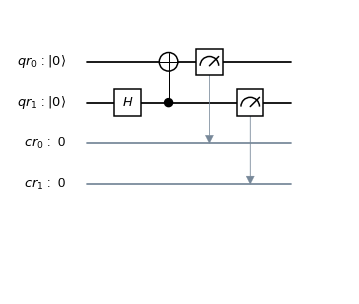

In [0]:
from qiskit.tools.visualization import plot_histogram, circuit_drawer
circuit_drawer(qc)

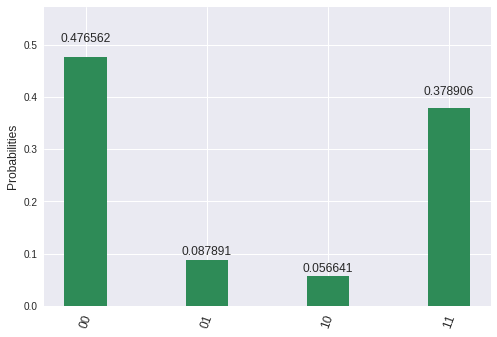

In [0]:
plot_histogram(results.get_counts('HelloWorldCircuit'))

# Upgraded version of the above code

In [0]:
import time
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit,  available_backends, execute, register, get_backend

# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

APItoken = 'a7dbfb3cfc1252c4a7555020c32808cff17102a467c595801371f7b7f1f7c3a3355d565469aa4a37564df269f3710f33d7d13ba3c900ca947c1513598b64c5e7'

qx_config = {
    "APItoken": APItoken,
    "url":"https://quantumexperience.ng.bluemix.net/api"}

try:
    register(qx_config['APItoken'], qx_config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

Please input your token and hit enter: ··········


The backend names "['ibmqx4', 'ibmq_qasm_simulator', 'ibmqx2', 'ibmqx5']" of this provider are already in use. Refer to documentation for `available_backends()` and `unregister()`.



You have access to great power!
['ibmqx4', 'ibmqx2', 'ibmqx5']


In [0]:
def lowest_pending_jobs():
    """Returns the backend with lowest pending jobs."""
    list_of_backends = available_backends(
        {'local': False, 'simulator': False})
    device_status = [get_backend(backend).status
                     for backend in list_of_backends]

    best = min([x for x in device_status if x['operational'] is True],
               key=lambda x: x['pending_jobs'])
    return best['name']

backend = lowest_pending_jobs()
print("The best backend is " + backend)

The best backend is ibmqx5


In [0]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)
job_exp = execute(qc, backend=backend, shots=1024, max_credits=3)

lapse = 0
interval = 10
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 10 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 9}
Status @ 20 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 9}
Status @ 30 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 9}
Status @ 40 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 9}
Status @ 50 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 9}
Status @ 60 seconds
{'job_id': '5b3cf6872f41af003

Status @ 250 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 6}
Status @ 260 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 6}
Status @ 270 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 6}
Status @ 280 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 6}
Status @ 290 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 6}
Status @ 300 seconds
{'job_id': '5b3cf6872f41af00391e2468', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 6}
Status @ 310 seconds
{'job_id': '5b3cf6872f41a

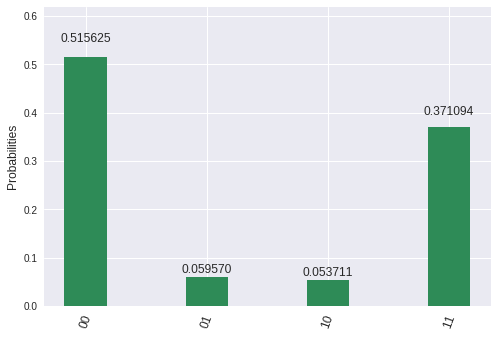

You have made entanglement!


In [0]:
plot_histogram(job_exp.result().get_counts(qc))

print('You have made entanglement!')

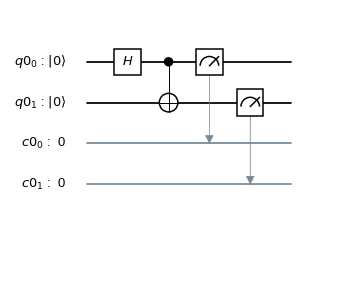

In [0]:
circuit_drawer(qc)